<center><img src="http://i.imgur.com/sSaOozN.png" width="500"></center>

## Course: Computational Thinking for Governance Analytics

### Prof. José Manuel Magallanes, PhD 
* Visiting Professor of Computational Policy at Evans School of Public Policy and Governance, and eScience Institute Senior Data Science Fellow, University of Washington.
* Professor of Government and Political Methodology, Pontificia Universidad Católica del Perú. 

_____

# Data Preprocessing in Python: Data Integration and Reshaping

I will cover some important processes for DFs:
* Appending
* Reshaping
* Merging

# 1. Appending

As the name implies, this process binds DFs into one: one or more DFs will be put below or on top of another DF. The only requisites are that all of them share the same column names, and the same data types.

Let's visit this website: https://fundforpeace.org/what-we-do/country-risk-and-fragility-data/

There, you will find several excel files with the _Fragile States Index_ per year. Let's open the ones for years 2019-2021:

In [1]:
import pandas as pd

file2021="fsi-2021.xlsx"
file2020="fsi-2020.xlsx"
file2019="fsi-2019.xlsx"
    

# fetching the tables
fragil2021=pd.read_excel(file2021)
fragil2020=pd.read_excel(file2020)
fragil2019=pd.read_excel(file2019)

The goal is to append all of them. Let's see if they have the same column names with the help of **set**s:

In [2]:
A=['a','b','c']
B=['a','b','d','c']
C=['a','b','e','g']

set(A) & set(B) & set(C)

{'a', 'b'}

Then:

In [3]:
set(fragil2021.columns)&set(fragil2020)&set(fragil2019)

{'C1: Security Apparatus',
 'C2: Factionalized Elites',
 'C3: Group Grievance',
 'Country',
 'E1: Economy',
 'E2: Economic Inequality',
 'E3: Human Flight and Brain Drain',
 'P1: State Legitimacy',
 'P2: Public Services',
 'P3: Human Rights',
 'Rank',
 'S1: Demographic Pressures',
 'S2: Refugees and IDPs',
 'Total',
 'X1: External Intervention',
 'Year'}

In [4]:
sorted(list(set(fragil2021.columns)&set(fragil2020)&set(fragil2019)))

['C1: Security Apparatus',
 'C2: Factionalized Elites',
 'C3: Group Grievance',
 'Country',
 'E1: Economy',
 'E2: Economic Inequality',
 'E3: Human Flight and Brain Drain',
 'P1: State Legitimacy',
 'P2: Public Services',
 'P3: Human Rights',
 'Rank',
 'S1: Demographic Pressures',
 'S2: Refugees and IDPs',
 'Total',
 'X1: External Intervention',
 'Year']

Then:

In [5]:
common=sorted(list(set(fragil2021.columns)&set(fragil2020)&set(fragil2019)))
fragil2021=fragil2021.loc[:,common]
fragil2020=fragil2020.loc[:,common]
fragil2019=fragil2019.loc[:,common]

Let's check the data types with the help of **zip** and **set**:

In [6]:
A=['a','b','c']
B=['a','b','c']
C=['a','b','d']
list(zip(A,B,C))

[('a', 'a', 'a'), ('b', 'b', 'b'), ('c', 'c', 'd')]

Then, you detect where a group does not have all the elements equal:

In [7]:
[x for x in zip(A,B,C) if len(set(x))>1]

[('c', 'c', 'd')]

Applying that to our case:

In [8]:
theZips=zip(fragil2021.dtypes.index,fragil2021.dtypes,fragil2020.dtypes,fragil2019.dtypes)
[x for x in theZips if len(set(x))>2]

[('Year', dtype('int64'), dtype('<M8[ns]'), dtype('<M8[ns]'))]

The Year is not an integer in the DFs for 2020 and 2019, it is **date** type.

In [9]:
fragil2020['Year']=fragil2020['Year'].dt.year
fragil2019['Year']=fragil2019['Year'].dt.year

Now it should be fine:

In [10]:
theZips=zip(fragil2021.dtypes.index,fragil2021.dtypes,fragil2020.dtypes,fragil2019.dtypes)
[x for x in theZips if len(set(x))>2]

[]

Let's do the appending!

In [11]:
fragile=pd.concat([fragil2021,fragil2020,fragil2019])
fragile

,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,Country,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,Rank,S1: Demographic Pressures,S2: Refugees and IDPs,Total,X1: External Intervention,Year
0,9.4,10.0,9.4,Yemen,9.8,7.7,6.7,9.9,9.8,9.7,1st,9.8,9.8,111.7,9.7,2021
1,9.3,10.0,8.3,Somalia,9.2,9.5,8.8,9.2,9.8,8.7,2nd,10.0,9.2,110.9,8.9,2021
2,9.6,9.9,9.7,Syria,9.6,7.1,8.2,10.0,9.6,9.7,3rd,7.6,9.7,110.7,10.0,2021
3,9.7,9.2,8.8,South Sudan,9.2,8.9,6.7,9.5,10.0,8.7,4th,9.5,9.9,109.4,9.3,2021
4,8.6,9.5,9.4,Congo Democratic Republic,8.5,8.5,6.8,9.2,9.8,9.2,5th,9.8,10.0,108.4,9.1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.7,1.7,3.3,Australia,1.6,1.6,1.0,1.0,1.5,1.7,174th,1.2,1.7,19.7,0.7,2019
174,1.3,1.4,4.3,Denmark,1.6,1.2,1.9,0.9,0.9,1.7,175th,1.6,2.0,19.5,0.7,2019
175,1.1,1.0,3.3,Switzerland,1.9,1.8,1.7,0.7,1.0,1.4,176th,1.4,2.7,18.7,0.7,2019
176,2.1,1.1,3.3,Norway,1.9,1.0,1.3,0.6,0.8,0.9,177th,1.2,2.8,18.0,1.0,2019


You may notice that the column ordering does not look nice, let's try something:

In [12]:
fragile.set_index(['Country','Year','Total'],inplace=True)
fragile

,,,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,Rank,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention
Country,Year,Total,,,,,,,,,,,,,
Yemen,2021,111.7,9.4,10.0,9.4,9.8,7.7,6.7,9.9,9.8,9.7,1st,9.8,9.8,9.7
Somalia,2021,110.9,9.3,10.0,8.3,9.2,9.5,8.8,9.2,9.8,8.7,2nd,10.0,9.2,8.9
Syria,2021,110.7,9.6,9.9,9.7,9.6,7.1,8.2,10.0,9.6,9.7,3rd,7.6,9.7,10.0
South Sudan,2021,109.4,9.7,9.2,8.8,9.2,8.9,6.7,9.5,10.0,8.7,4th,9.5,9.9,9.3
Congo Democratic Republic,2021,108.4,8.6,9.5,9.4,8.5,8.5,6.8,9.2,9.8,9.2,5th,9.8,10.0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Australia,2019,19.7,2.7,1.7,3.3,1.6,1.6,1.0,1.0,1.5,1.7,174th,1.2,1.7,0.7
Denmark,2019,19.5,1.3,1.4,4.3,1.6,1.2,1.9,0.9,0.9,1.7,175th,1.6,2.0,0.7
Switzerland,2019,18.7,1.1,1.0,3.3,1.9,1.8,1.7,0.7,1.0,1.4,176th,1.4,2.7,0.7


Delet _Rank_:

In [13]:
fragile.drop(columns='Rank',inplace=True)
fragile

,,,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention
Country,Year,Total,,,,,,,,,,,,
Yemen,2021,111.7,9.4,10.0,9.4,9.8,7.7,6.7,9.9,9.8,9.7,9.8,9.8,9.7
Somalia,2021,110.9,9.3,10.0,8.3,9.2,9.5,8.8,9.2,9.8,8.7,10.0,9.2,8.9
Syria,2021,110.7,9.6,9.9,9.7,9.6,7.1,8.2,10.0,9.6,9.7,7.6,9.7,10.0
South Sudan,2021,109.4,9.7,9.2,8.8,9.2,8.9,6.7,9.5,10.0,8.7,9.5,9.9,9.3
Congo Democratic Republic,2021,108.4,8.6,9.5,9.4,8.5,8.5,6.8,9.2,9.8,9.2,9.8,10.0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Australia,2019,19.7,2.7,1.7,3.3,1.6,1.6,1.0,1.0,1.5,1.7,1.2,1.7,0.7
Denmark,2019,19.5,1.3,1.4,4.3,1.6,1.2,1.9,0.9,0.9,1.7,1.6,2.0,0.7
Switzerland,2019,18.7,1.1,1.0,3.3,1.9,1.8,1.7,0.7,1.0,1.4,1.4,2.7,0.7


Now put the row indexes back:

In [14]:
fragile.reset_index(inplace=True)
fragile

,Country,Year,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention
0,Yemen,2021,111.7,9.4,10.0,9.4,9.8,7.7,6.7,9.9,9.8,9.7,9.8,9.8,9.7
1,Somalia,2021,110.9,9.3,10.0,8.3,9.2,9.5,8.8,9.2,9.8,8.7,10.0,9.2,8.9
2,Syria,2021,110.7,9.6,9.9,9.7,9.6,7.1,8.2,10.0,9.6,9.7,7.6,9.7,10.0
3,South Sudan,2021,109.4,9.7,9.2,8.8,9.2,8.9,6.7,9.5,10.0,8.7,9.5,9.9,9.3
4,Congo Democratic Republic,2021,108.4,8.6,9.5,9.4,8.5,8.5,6.8,9.2,9.8,9.2,9.8,10.0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,Australia,2019,19.7,2.7,1.7,3.3,1.6,1.6,1.0,1.0,1.5,1.7,1.2,1.7,0.7
531,Denmark,2019,19.5,1.3,1.4,4.3,1.6,1.2,1.9,0.9,0.9,1.7,1.6,2.0,0.7
532,Switzerland,2019,18.7,1.1,1.0,3.3,1.9,1.8,1.7,0.7,1.0,1.4,1.4,2.7,0.7
533,Norway,2019,18.0,2.1,1.1,3.3,1.9,1.0,1.3,0.6,0.8,0.9,1.2,2.8,1.0


In [15]:
fragile.columns=fragile.columns.str.replace(':|\s',"",regex=True)
fragile

,Country,Year,Total,C1SecurityApparatus,C2FactionalizedElites,C3GroupGrievance,E1Economy,E2EconomicInequality,E3HumanFlightandBrainDrain,P1StateLegitimacy,P2PublicServices,P3HumanRights,S1DemographicPressures,S2RefugeesandIDPs,X1ExternalIntervention
0,Yemen,2021,111.7,9.4,10.0,9.4,9.8,7.7,6.7,9.9,9.8,9.7,9.8,9.8,9.7
1,Somalia,2021,110.9,9.3,10.0,8.3,9.2,9.5,8.8,9.2,9.8,8.7,10.0,9.2,8.9
2,Syria,2021,110.7,9.6,9.9,9.7,9.6,7.1,8.2,10.0,9.6,9.7,7.6,9.7,10.0
3,South Sudan,2021,109.4,9.7,9.2,8.8,9.2,8.9,6.7,9.5,10.0,8.7,9.5,9.9,9.3
4,Congo Democratic Republic,2021,108.4,8.6,9.5,9.4,8.5,8.5,6.8,9.2,9.8,9.2,9.8,10.0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,Australia,2019,19.7,2.7,1.7,3.3,1.6,1.6,1.0,1.0,1.5,1.7,1.2,1.7,0.7
531,Denmark,2019,19.5,1.3,1.4,4.3,1.6,1.2,1.9,0.9,0.9,1.7,1.6,2.0,0.7
532,Switzerland,2019,18.7,1.1,1.0,3.3,1.9,1.8,1.7,0.7,1.0,1.4,1.4,2.7,0.7
533,Norway,2019,18.0,2.1,1.1,3.3,1.9,1.0,1.3,0.6,0.8,0.9,1.2,2.8,1.0


In [16]:
fragile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     535 non-null    object 
 1   Year                        535 non-null    int64  
 2   Total                       535 non-null    float64
 3   C1SecurityApparatus         535 non-null    float64
 4   C2FactionalizedElites       535 non-null    float64
 5   C3GroupGrievance            535 non-null    float64
 6   E1Economy                   535 non-null    float64
 7   E2EconomicInequality        535 non-null    float64
 8   E3HumanFlightandBrainDrain  535 non-null    float64
 9   P1StateLegitimacy           535 non-null    float64
 10  P2PublicServices            535 non-null    float64
 11  P3HumanRights               535 non-null    float64
 12  S1DemographicPressures      535 non-null    float64
 13  S2RefugeesandIDPs           535 non

# 2. Reshaping

Let me keep some columns from the last DF:

In [17]:
fragileLong=fragile.iloc[:,:3]
fragileLong

,Country,Year,Total
0,Yemen,2021,111.7
1,Somalia,2021,110.9
2,Syria,2021,110.7
3,South Sudan,2021,109.4
4,Congo Democratic Republic,2021,108.4
...,...,...,...
530,Australia,2019,19.7
531,Denmark,2019,19.5
532,Switzerland,2019,18.7
533,Norway,2019,18.0


The unit of analysis is country. Generally, we are used to see the  unit of analysis once in a column, but here it is repeated for every year.

In [18]:
# wide
fragileWide=pd.pivot_table(fragileLong,
               values='Total',
               index=['Country'],
               columns=['Year']).\
            reset_index(drop=False).\
            rename_axis(index=None, columns=None)
fragileWide

,Country,2019,2020,2021
0,Afghanistan,105.0,102.901187,102.1
1,Albania,58.9,58.753811,59.0
2,Algeria,75.4,74.575183,73.6
3,Angola,87.8,87.320039,89.0
4,Antigua and Barbuda,54.4,52.062352,54.9
...,...,...,...,...
181,Venezuela,89.3,91.157591,92.6
182,Vietnam,66.1,63.885397,63.3
183,Yemen,113.5,112.438694,111.7
184,Zambia,85.7,84.474129,84.9


In [19]:
fragileWide[fragileWide.isna().any(axis=1)]

,Country,2019,2020,2021
27,Cabo Verde,NaN,NaN,64.2
31,Cape Verde,66.6,64.778171,NaN
45,Czech Republic,NaN,35.741616,NaN
46,Czechia,37.6,NaN,39.3
56,Eswatini,85.3,NaN,82.5
81,Israel,NaN,NaN,43.0
82,Israel and West Bank,76.5,75.123972,NaN
90,Kyrgyz Republic,76.2,73.929364,NaN
91,Kyrgyzstan,NaN,NaN,76.4
100,Macedonia,64.6,62.130864,NaN


In [20]:
changes={"Cabo Verde": "Cape Verde",
"Czechia":"Czech Republic",
"Swaziland":"Eswatini",
"Israel and West Bank":"Israel",
"Kyrgyzstan":"Kyrgyz Republic",
"North Macedonia":"Macedonia",
"Slovakia": "Slovak Republic"}
fragileLong.Country.replace(to_replace=changes,inplace=True)

In [21]:
# wide
fragileWide=pd.pivot_table(fragileLong,
               values='Total',
               index=['Country'],
               columns=['Year']).\
            reset_index(drop=False).\
            rename_axis(index=None, columns=None)
##
fragileWide[fragileWide.isna().any(axis=1)]

,Country,2019,2020,2021
124,Palestine,NaN,NaN,86.0


In [22]:
fragileWide[~fragileWide.isna().any(axis=1)]

,Country,2019,2020,2021
0,Afghanistan,105.0,102.901187,102.1
1,Albania,58.9,58.753811,59.0
2,Algeria,75.4,74.575183,73.6
3,Angola,87.8,87.320039,89.0
4,Antigua and Barbuda,54.4,52.062352,54.9
...,...,...,...,...
174,Venezuela,89.3,91.157591,92.6
175,Vietnam,66.1,63.885397,63.3
176,Yemen,113.5,112.438694,111.7
177,Zambia,85.7,84.474129,84.9


# 3. Merging

Integrating data sets needs the following considerations:

* Merging is done on two data frames.
* You need a column in each data frame with that share the same exact and unique values. The column names or titles need not be the same.
* The merged table shows by default the mutual coincidences; but you can also request the values not matched, which will help you detect possible extra cleaning.
* Pandas differentiates the **left** from the **right** data frames.

In [23]:
demo=pd.read_pickle("https://github.com/EvansDataScience/CTforGA_cleaning/raw/main/demoindex.pkl")
#and
fragile2021=fragile[fragile.Year==2021].drop(columns=['Year','Total'])

In [24]:
fragile2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 178
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     179 non-null    object 
 1   C1SecurityApparatus         179 non-null    float64
 2   C2FactionalizedElites       179 non-null    float64
 3   C3GroupGrievance            179 non-null    float64
 4   E1Economy                   179 non-null    float64
 5   E2EconomicInequality        179 non-null    float64
 6   E3HumanFlightandBrainDrain  179 non-null    float64
 7   P1StateLegitimacy           179 non-null    float64
 8   P2PublicServices            179 non-null    float64
 9   P3HumanRights               179 non-null    float64
 10  S1DemographicPressures      179 non-null    float64
 11  S2RefugeesandIDPs           179 non-null    float64
 12  X1ExternalIntervention      179 non-null    float64
dtypes: float64(12), object(1)
memory us

Remember the amount of rows of each DF:

In [25]:
demo.shape,fragile2021.shape

((167, 8), (179, 13))

The best scenario would be to create a merged DF with 167 rows, but the actual result is:

In [26]:
demo.merge(fragile2021).shape

(158, 20)

We are some countries far from the best scenario.

In [27]:
OnlyDemo=set(demo.Country)-set(fragile2021.Country)
OnlyDemo

{'Cape Verde',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'East Timor',
 'Guinea-Bissau',
 'Hong Kong',
 'Ivory Coast',
 'Republic of the Congo',
 'Taiwan'}

In [28]:
OnlyFragile=set(fragile2021.Country)-set(demo.Country)
OnlyFragile

{'Antigua and Barbuda',
 'Bahamas',
 'Barbados',
 'Belize',
 'Brunei Darussalam',
 'Cabo Verde',
 'Congo Democratic Republic',
 'Congo Republic',
 "Cote d'Ivoire",
 'Czechia',
 'Grenada',
 'Guinea Bissau',
 'Maldives',
 'Micronesia',
 'Samoa',
 'Sao Tome and Principe',
 'Seychelles',
 'Solomon Islands',
 'Somalia',
 'South Sudan',
 'Timor-Leste'}

In [29]:
from thefuzz import process

[(process.extractOne(demo, OnlyFragile),demo) for demo in sorted(OnlyDemo)]

[(('Cabo Verde', 80), 'Cape Verde'),
 (('Congo Democratic Republic', 86), 'Czech Republic'),
 (('Congo Democratic Republic', 95), 'Democratic Republic of the Congo'),
 (('Timor-Leste', 82), 'East Timor'),
 (('Guinea Bissau', 100), 'Guinea-Bissau'),
 (('Congo Democratic Republic', 50), 'Hong Kong'),
 (("Cote d'Ivoire", 64), 'Ivory Coast'),
 (('Congo Republic', 86), 'Republic of the Congo'),
 (('Somalia', 46), 'Taiwan')]

In [30]:
[(process.extractOne(demo, OnlyFragile),demo) for demo in sorted(OnlyDemo) if process.extractOne(demo, OnlyFragile)[1]>90]

[(('Congo Democratic Republic', 95), 'Democratic Republic of the Congo'),
 (('Guinea Bissau', 100), 'Guinea-Bissau')]

In [31]:
{process.extractOne(demo, OnlyFragile)[0]:demo for demo in sorted(OnlyDemo) if process.extractOne(demo, OnlyFragile)[1]>90}

{'Congo Democratic Republic': 'Democratic Republic of the Congo',
 'Guinea Bissau': 'Guinea-Bissau'}

In [32]:
changesFragile1={process.extractOne(demo, OnlyFragile)[0]:demo for demo in sorted(OnlyDemo) if process.extractOne(demo, OnlyFragile)[1]>90}
fragile2021.Country.replace(changesFragile1,inplace=True)

In [33]:
OnlyDemo=set(demo.Country)-set(fragile2021.Country)
OnlyFragile=set(fragile2021.Country)-set(demo.Country)
[(process.extractOne(demo, OnlyFragile),demo) for demo in sorted(OnlyDemo)]

[(('Cabo Verde', 80), 'Cape Verde'),
 (('Congo Republic', 71), 'Czech Republic'),
 (('Timor-Leste', 82), 'East Timor'),
 (('Congo Republic', 40), 'Hong Kong'),
 (("Cote d'Ivoire", 64), 'Ivory Coast'),
 (('Congo Republic', 86), 'Republic of the Congo'),
 (('Somalia', 46), 'Taiwan')]

In [34]:
changesFragile2={process.extractOne(demo, OnlyFragile)[0]:demo for demo in sorted(OnlyDemo) if process.extractOne(demo, OnlyFragile)[1]>79}
fragile2021.Country.replace(changesFragile2,inplace=True)

In [35]:
OnlyDemo=set(demo.Country)-set(fragile2021.Country)
OnlyFragile=set(fragile2021.Country)-set(demo.Country)
[(process.extractOne(demo, OnlyFragile),demo) for demo in sorted(OnlyDemo)]

[(('Czechia', 64), 'Czech Republic'),
 (('Antigua and Barbuda', 40), 'Hong Kong'),
 (("Cote d'Ivoire", 64), 'Ivory Coast'),
 (('Somalia', 46), 'Taiwan')]

In [36]:
changesFragile3={process.extractOne(demo, OnlyFragile)[0]:demo for demo in sorted(OnlyDemo) if process.extractOne(demo, OnlyFragile)[1]>60}
fragile2021.Country.replace(changesFragile3,inplace=True)

In [37]:
demo.merge(fragil2021).shape

(158, 23)

Then:

In [38]:
demo_fragile=demo.merge(fragile2021)

In [39]:
demo_fragile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Country                       165 non-null    object  
 1   Regimetype                    132 non-null    category
 2   Overallscore                  165 non-null    float64 
 3   Electoralprocessandpluralism  165 non-null    float64 
 4   Functioningofgovernment       165 non-null    float64 
 5   Politicalparticipation        165 non-null    float64 
 6   Politicalculture              165 non-null    float64 
 7   Civilliberties                165 non-null    float64 
 8   C1SecurityApparatus           165 non-null    float64 
 9   C2FactionalizedElites         165 non-null    float64 
 10  C3GroupGrievance              165 non-null    float64 
 11  E1Economy                     165 non-null    float64 
 12  E2EconomicInequality          165 non-null    floa

## Final decisions

We need to understand that we have two sets of columns, each representing a complex concept. The basic intuition is that if several variables represent something, there should be some significant correlation among them:

<AxesSubplot:>

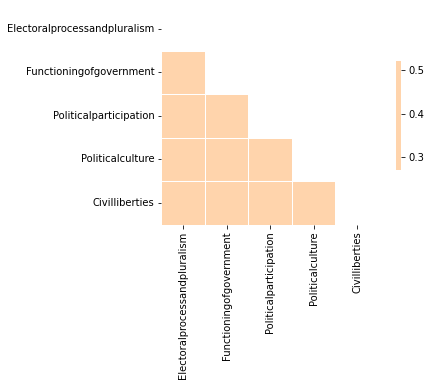

In [45]:
demo=demo_fragile.loc[:,"Electoralprocessandpluralism":"Civilliberties"]
fragile=demo_fragile.loc[:,"C1SecurityApparatus":"X1ExternalIntervention"]

corrDemo = demo.corr()
corrFrag = fragile.corr()

# Generate a mask for the upper triangle
import numpy as np
maskDemo = np.triu(np.ones_like(corrDemo, dtype=bool))
import seaborn as sns
sns.heatmap(corrDemo, mask=maskDemo, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<AxesSubplot:>

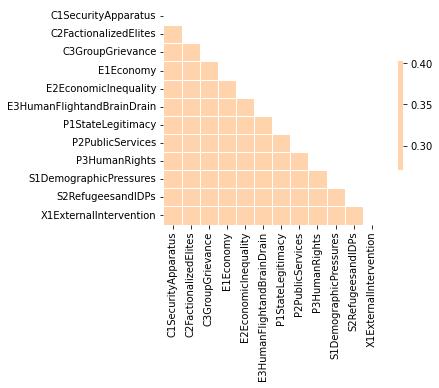

In [46]:
maskFrag = np.triu(np.ones_like(corrFrag, dtype=bool))
sns.heatmap(corrFrag, mask=maskFrag, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

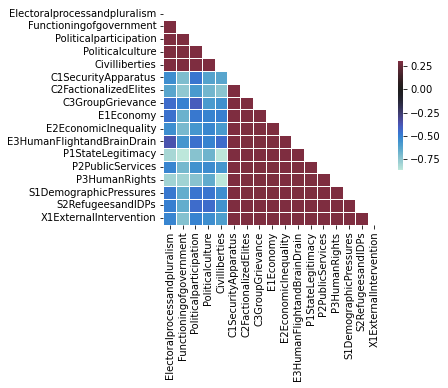

In [48]:

corrDemoFrag = demo_fragile.iloc[:,3:].corr()

maskDemoFrag = np.triu(np.ones_like(corrDemoFrag, dtype=bool))

sns.heatmap(corrDemoFrag, mask=maskDemoFrag, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


This is telling you that  the higher the democracy indicators the more democratic a country is; while in the case of country fragility, the higher the values the more fragile the country. Then, we need that both sets represent the same monotony.

In [55]:
fragile_Asc=fragile.apply(lambda x:10-x)
fragile_Asc

,C1SecurityApparatus,C2FactionalizedElites,C3GroupGrievance,E1Economy,E2EconomicInequality,E3HumanFlightandBrainDrain,P1StateLegitimacy,P2PublicServices,P3HumanRights,S1DemographicPressures,S2RefugeesandIDPs,X1ExternalIntervention
0,8.2,8.9,6.7,8.1,9.0,9.2,9.5,8.4,9.5,8.6,7.8,9.5
1,8.6,8.6,7.4,6.6,7.9,8.4,9.5,8.6,9.5,8.6,8.4,9.5
2,7.5,8.6,9.4,7.1,9.0,8.5,9.5,8.4,9.5,8.3,8.5,9.5
3,7.3,8.2,8.3,8.1,8.3,9.3,9.5,8.6,9.1,6.7,5.7,9.5
4,9.3,8.2,9.5,6.6,8.7,8.1,9.5,8.8,9.5,8.5,8.5,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...
160,2.0,0.3,1.9,1.5,0.4,3.4,1.0,0.0,0.7,1.1,0.3,0.4
161,1.4,0.5,0.6,1.5,1.5,3.2,0.8,0.2,0.8,0.2,0.0,0.9
162,2.0,1.2,4.8,1.1,2.7,6.2,0.1,1.4,0.6,2.9,6.2,0.8
163,1.1,1.7,0.1,5.2,2.9,3.5,1.9,1.1,0.9,3.7,1.2,2.9


<AxesSubplot:>

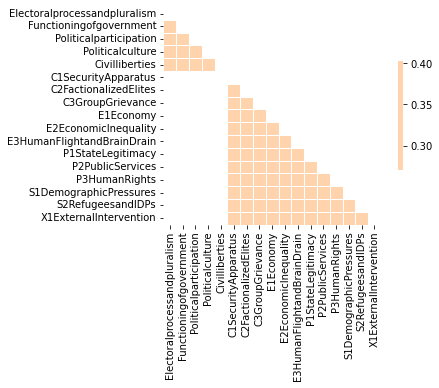

In [60]:
corrDemoFragAsc = pd.concat([demo,fragile_Asc]).corr()
maskDemoFragAsc = np.triu(np.ones_like(corrDemoFragAsc, dtype=bool))

sns.heatmap(corrDemoFragAsc, mask=maskDemoFragAsc, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [58]:
demo_fragile_aspd.concat([demo_fragile.loc[:,:'Civilliberties'],fragile_Asc],axis=1)

,Country,Regimetype,Overallscore,Electoralprocessandpluralism,Functioningofgovernment,Politicalparticipation,Politicalculture,Civilliberties,C1SecurityApparatus,C2FactionalizedElites,C3GroupGrievance,E1Economy,E2EconomicInequality,E3HumanFlightandBrainDrain,P1StateLegitimacy,P2PublicServices,P3HumanRights,S1DemographicPressures,S2RefugeesandIDPs,X1ExternalIntervention
0,Norway,Full democracy,9.75,10.00,9.64,10.00,10.00,9.12,8.2,8.9,6.7,8.1,9.0,9.2,9.5,8.4,9.5,8.6,7.8,9.5
1,New Zealand,Full democracy,9.37,10.00,8.93,9.44,8.75,9.71,8.6,8.6,7.4,6.6,7.9,8.4,9.5,8.6,9.5,8.6,8.4,9.5
2,Finland,Full democracy,9.27,10.00,9.29,8.89,8.75,9.41,7.5,8.6,9.4,7.1,9.0,8.5,9.5,8.4,9.5,8.3,8.5,9.5
3,Sweden,Full democracy,9.26,9.58,9.29,8.33,10.00,9.12,7.3,8.2,8.3,8.1,8.3,9.3,9.5,8.6,9.1,6.7,5.7,9.5
4,Iceland,Full democracy,9.18,10.00,8.21,8.89,9.38,9.41,9.3,8.2,9.5,6.6,8.7,8.1,9.5,8.8,9.5,8.5,8.5,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Central African Republic,Authoritarian,1.43,1.25,0.00,1.67,1.88,2.35,2.0,0.3,1.9,1.5,0.4,3.4,1.0,0.0,0.7,1.1,0.3,0.4
161,Democratic Republic of the Congo,Authoritarian,1.40,0.75,0.00,2.22,3.13,0.88,1.4,0.5,0.6,1.5,1.5,3.2,0.8,0.2,0.8,0.2,0.0,0.9
162,North Korea,Authoritarian,1.08,0.00,2.50,1.67,1.25,0.00,2.0,1.2,4.8,1.1,2.7,6.2,0.1,1.4,0.6,2.9,6.2,0.8
163,Myanmar,Authoritarian,1.02,0.00,0.00,1.67,3.13,0.29,1.1,1.7,0.1,5.2,2.9,3.5,1.9,1.1,0.9,3.7,1.2,2.9


____


# <font color="red">Exporting file</font>

The current _demo_fragile_ data frame is clean and formatted.It is time to send it to a format that will keep all our work for future use:

#### For future use in Python:

In [155]:
demo_fragile.to_pickle("demo_fragile.pkl")
# you will need: DF=pd.read_pickle("demo_fragile.pkl")
# or:
# from urllib.request import urlopen
# DF=pd.read_pickle(urlopen("https://..../demo_fragile.pkl"),compression=None)

#### For future  use in R:

In [156]:
#try the following before starting Python:
#export LD_LIBRARY_PATH="$(python -m rpy2.situation LD_LIBRARY_PATH)":${LD_LIBRARY_PATH}

from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr

base = importr('base')
base.saveRDS(demo_fragile,file="demo_fragile.RDS")

#In R, you call it with: DF = readRDS("demo_fragile.RDS")
#or, if iyou read from cloud: DF = readRDS(url("https://..../demo_fragile.RDS")

<rpy2.rinterface_lib.sexp.NULLType object at 0x7ff0919c62d0> [RTYPES.NILSXP]